# Retail Analysis Walmart


#### DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. Historical sales data for 45 Walmart stores located in different regions are available.

##### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


**Analysis Tasks**

Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

**Statistical Model**

Build  prediction models to forecast demand

Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Select the model which gives best accuracy.

In [1]:
#Let us import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

#Reading the data
df = pd.read_csv('Walmart_Store_sales.csv', parse_dates = ['Date'])

In [2]:
#Displaying top 5 rows of the data
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#Checking if data has null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
#Brief description of numeric columns of data
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
#Information about types of data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
#Which store has maximum sales?
#Which store has maximum standard deviation and coeficient of mean to standard deviation?
#To answer these questions, let us group the data by stores and calculate average, total and std of sales by store

df_temp = df.groupby('Store').agg({'Weekly_Sales':['mean','sum','std']})
df_temp['coeff'] = df_temp[('Weekly_Sales','mean')]/df_temp[('Weekly_Sales','std')]
print(df_temp.head())
print()
print('Store with max sales by mean:',df_temp['Weekly_Sales','mean'].idxmax())
print('Store with max sales by total:',df_temp['Weekly_Sales','sum'].idxmax())
print('Store with max std:',df_temp['Weekly_Sales','std'].idxmax())
print('Coefficient of mean to std for store with max std:',df_temp.coeff[df_temp['Weekly_Sales','std'].idxmax()])

       Weekly_Sales                                  coeff
               mean           sum            std          
Store                                                     
1      1.555264e+06  2.224028e+08  155980.767761  9.970873
2      1.925751e+06  2.753824e+08  237683.694682  8.102160
3      4.027044e+05  5.758674e+07   46319.631557  8.694034
4      2.094713e+06  2.995440e+08  266201.442297  7.868902
5      3.180118e+05  4.547569e+07   37737.965745  8.426840

Store with max sales by mean: 20
Store with max sales by total: 20
Store with max std: 14
Coefficient of mean to std for store with max std: 6.363884253900052


In [7]:
#Which store has good quarterly growth rate in Q3'2012?
#Let us identify which quarters the dates fall under.
def quarter(row):
    if row.month in (4,5,6):
        return ('Q2-'+str(row.year))
    if row.month in (7,8,9):
        return ('Q3-'+str(row.year))
    if row.month in (1,2,3):
        return ('Q1-'+str(row.year))
    if row.month in (10,11,12):
        return ('Q4-'+str(row.year))

df['Quarter']=df['Date'].apply(quarter)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Q2-2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Q4-2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Q1-2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Q1-2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Q2-2010


In [8]:
#First let us group the data by store and quarters

df_quarter =  df[(df['Quarter']=='Q2-2012') | (df['Quarter'] == 'Q3-2012')].groupby(['Store','Quarter']).agg({'Weekly_Sales':'sum'})
print('Grouped data')
print(df_quarter.head())
print()


#Make a new dataframe to store the store numbers and their growth rates in Q3'2012
#The growth rates are calculated from the total sales per quarter of the grouped data

df_growth = pd.DataFrame(df['Store'].unique())
df_growth['Growth']=pd.Series()
for i in range(1,46):    
    df_growth.Growth.iloc[i-1] = (df_quarter.Weekly_Sales.loc[(i,'Q3-2012')] - df_quarter.Weekly_Sales.loc[(i,'Q2-2012')])/df_quarter.Weekly_Sales.loc[(i,'Q2-2012')]
df_growth.rename(columns={0:'store'},inplace=True)
print('Growth in Q3 of each store')
print(df_growth)
print("Store with max growth rate in Q3'2012: ",df_growth.Growth.idxmax())

Grouped data
               Weekly_Sales
Store Quarter              
1     Q2-2012   21036965.58
      Q3-2012   18633209.98
2     Q2-2012   25085123.61
      Q3-2012   22396867.61
3     Q2-2012    5562668.16

Growth in Q3 of each store
    store    Growth
0       1 -0.114263
1       2 -0.107165
2       3 -0.107174
3       4 -0.096253
4       5 -0.123471
5       6 -0.115189
6       7 -0.038247
7       8 -0.088855
8       9 -0.121524
9      10 -0.102934
10     11 -0.099822
11     12 -0.107316
12     13 -0.092647
13     14 -0.175511
14     15 -0.121833
15     16 -0.027893
16     17 -0.107199
17     18 -0.095932
18     19 -0.091232
19     20 -0.104691
20     21 -0.089177
21     22 -0.113325
22     23 -0.064527
23     24 -0.092423
24     25 -0.101436
25     26 -0.060576
26     27 -0.106331
27     28 -0.113643
28     29 -0.128884
29     30 -0.104446
30     31 -0.098351
31     32 -0.082585
32     33 -0.095402
33     34 -0.107464
34     35 -0.046631
35     36 -0.125234
36     37 -0.088815
37 

<ipython-input-8-8941875d2084>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_growth['Growth']=pd.Series()
C:\Users\hnyap\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Hence store 15 has highest growth rate. However, as all growth rates are negative, store 15 has least negative growth rate.

In [9]:
#Which holidays have higher sales than the man sales of non holiday season?
#First let us create a new column to identify the holidays.

df.sort_values(by = 'Date',inplace = True)

def holiday(row):
    if row in list(map(pd.to_datetime,('2010-02-12','2011-02-11','2012-02-10','2013-02-08'))):
        return 'Super bowl'
    if row in list(map(pd.to_datetime,('2010-09-10','2011-09-09','2012-09-07','2013-09-06'))):
        return 'Labour day'
    if row in list(map(pd.to_datetime,('2010-11-26','2011-11-25','2012-11-23','2013-11-29'))):
        return 'Thanksgiving'
    if row in list(map(pd.to_datetime,('2010-12-31','2011-12-30','2012-12-28','2013-12-27'))):
        return 'Christmas'

df['Holiday'] = df['Date'].apply(holiday)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,Q1-2010,None
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,Q1-2010,None
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,Q1-2010,None
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,Q1-2010,None
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,Q1-2010,None


In [10]:
#Now let us group the data by holidays, calculate mean sales on each holiday and mean sales of non holiday season
#Then we can compare the two

df_hol = df[df['Holiday'].notnull()].groupby('Holiday').agg({'Weekly_Sales':'mean'})
sales_mean = df.Weekly_Sales[df['Holiday_Flag']==0].mean()
df_hol['Is greater than avg sales'] = df_hol['Weekly_Sales'].apply(lambda x:'yes' if x > sales_mean else 'no')
print(df_hol)

              Weekly_Sales Is greater than avg sales
Holiday                                             
Christmas     9.608331e+05                        no
Labour day    1.039183e+06                        no
Thanksgiving  1.471273e+06                       yes


We can see that Thanksgiving affects sales positively whereas others affect it negatively. We do not have data about Superbowl.

Text(0, 0.5, 'Total Sales')

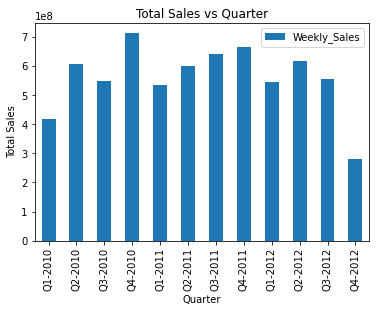

In [11]:
#Provide monthly and quarterly view of sales

#First let us check total sales in each quarter

ax1 = df.groupby('Quarter',sort=False).agg({'Weekly_Sales':'sum'}).plot(kind='bar',title='Total Sales vs Quarter')
ax1.set_ylabel('Total Sales')

Text(0, 0.5, 'Average Sales in a month')

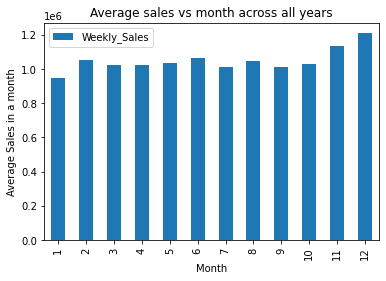

In [12]:
#Now let us check avg sales in a month across all years

df['Month'] = df['Date'].dt.month
ax2 = df.groupby('Month',sort = False).agg({'Weekly_Sales':'mean'}).plot(kind='bar',title='Average sales vs month across all years')
ax2.set_ylabel('Average Sales in a month')

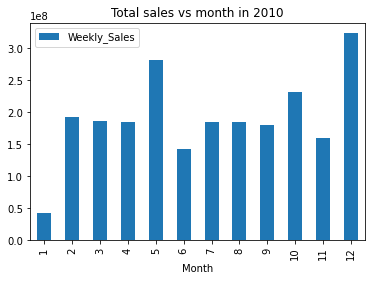

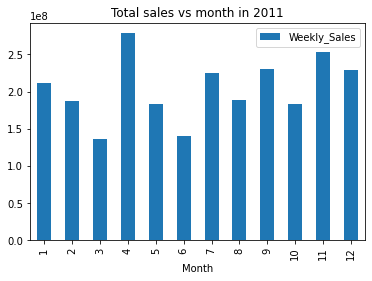

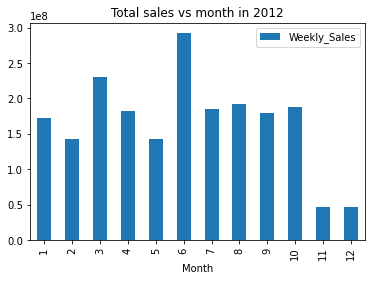

In [13]:
#Let us check Total sales in a month for each year separately

df[df['Date'].dt.year == 2010].groupby('Month',sort = False).agg({'Weekly_Sales':'sum'}).plot(kind='bar',title = 'Total sales vs month in 2010')

df[df['Date'].dt.year == 2011].groupby('Month',sort = False).agg({'Weekly_Sales':'sum'}).plot(kind='bar',title='Total sales vs month in 2011')

df[df['Date'].dt.year == 2012].groupby('Month',sort = False).agg({'Weekly_Sales':'sum'}).plot(kind='bar',title='Total sales vs month in 2012')


We can observe the following insights:
1. Quarter 4 in 2010 has the highest sales whereas Q4 in 2012 has the lowest(this could be because we have incomplete data of 2012).
2. We see that sales are greatest in an average in December.
3. When we plot monthly sales for each year, we do not see any particular pattern, however sales in December are higher than average each year (except 2012 due to incomplete data)
4. Sales are also high in the months 4-6.

In [14]:
#Model Building
#Let us create new variable for day of the year.

df["Dayofyear"]=df['Date'].dt.dayofyear
df['Year']=df['Date'].dt.year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday,Month,Dayofyear,Year
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,Q1-2010,None,1,10,2010
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,Q1-2010,None,1,10,2010
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,Q1-2010,None,1,10,2010
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,Q1-2010,None,1,10,2010
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,Q1-2010,None,1,10,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,Q4-2012,None,12,345,2012
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,Q4-2012,None,12,345,2012
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,Q4-2012,None,12,345,2012
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,Q4-2012,None,12,345,2012


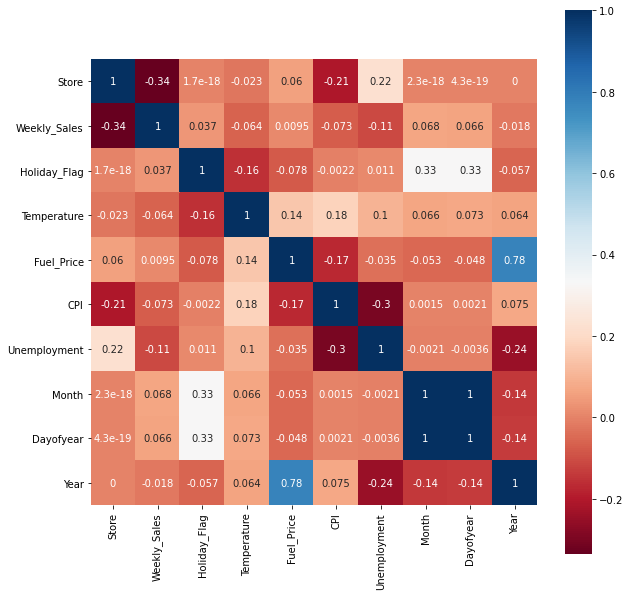

In [15]:
#Now before building the model, let us check correlations between the variables
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'RdBu', cbar = True, square = True, annot= True)

We see that store has the highest correlation with weekly sales. There are strong correlations between many target variables as well, however we will keep all the variables for prediction.

In [16]:
#Converting categorical into numeric
#As store number is categorical, let us create dummy variables
df2 = df.copy()
tp = pd.get_dummies(df.Store)
df = pd.concat([df, tp], axis=1)
df = df.drop(columns=['Store','Date','Quarter','Holiday','Month',45])

#Let us separate features and labels. 

Y = np.log(df['Weekly_Sales'])
X = df.drop(columns='Weekly_Sales')

In [17]:
#Let us split the data into train and test set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=100)
X_train.shape, X_test.shape

((4826, 51), (1609, 51))

In [18]:
# Let us fit a regression model to the data

lreg = LinearRegression(fit_intercept=True)
lreg.fit(X_train, Y_train)

LinearRegression()

In [19]:
#Let us print the intercept and coefficients of predictors

lreg.intercept_, lreg.coef_

(139.26332999309497,
 array([ 3.74064408e-02, -6.74080573e-04,  1.47626184e-02,  9.59113298e-03,
        -3.64965426e-02,  1.62522223e-04, -6.32643886e-02,  3.81022896e-01,
         5.95980576e-01, -1.01471990e+00,  1.45150516e+00, -1.25281818e+00,
         3.33551158e-01, -3.97988303e-01, -2.48518631e-01, -7.47786517e-01,
         1.43891852e+00,  1.94730697e-01,  9.85064179e-01,  1.44012448e+00,
         9.48888293e-01,  2.31005396e-01, -5.52292369e-01,  6.09671346e-01,
         8.23522993e-01,  1.08793523e+00,  7.31585151e-01, -3.38032739e-01,
         7.08507336e-01,  9.26357546e-01,  1.03413528e+00, -3.72606330e-01,
         7.11087329e-01,  1.24968187e+00,  1.26016274e+00,  1.64103465e-01,
        -8.69588082e-01,  2.87487025e-01,  3.33232366e-01, -5.27044218e-01,
         8.22340599e-01,  6.24004477e-01, -1.03064431e+00, -6.90312807e-01,
         2.30837808e-02,  3.37435402e-01,  5.45435311e-01,  3.61321782e-01,
         2.17428170e-01, -3.44403640e-01, -4.58520006e-01]))

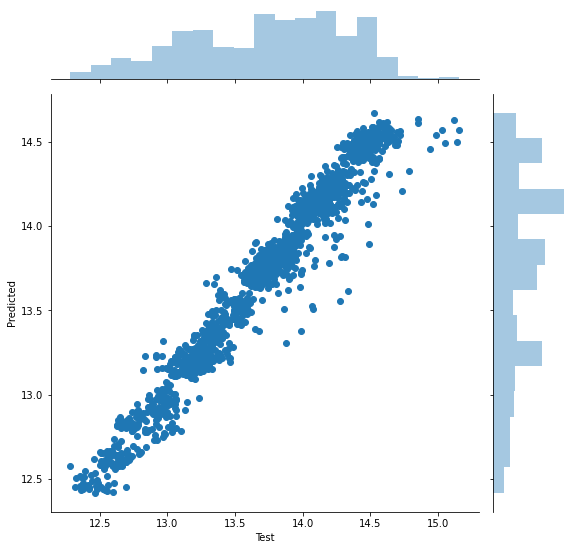

In [20]:
#Let us see how the model has performed on test set

train_pred = lreg.predict(X_train)
test_pred = lreg.predict(X_test)

h = sns.jointplot(x = Y_test, y = test_pred )
h.set_axis_labels('Test', 'Predicted')
plt.gcf().set_size_inches(8, 8)

There seems to be a strong fit between actual and predicted values. Let us check it numerically by calculating RMSE and R squared.

In [21]:
# Now we will compare accuracy of training and test set

print('RMSE and R squared for training set :',mean_squared_error(Y_train,train_pred,squared=False), r2_score(Y_train,train_pred))
print('RMSE and R squared for test set :',mean_squared_error(Y_test,test_pred,squared=False), r2_score(Y_test,test_pred))

RMSE and R squared for training set : 0.11689605576426969 0.9605888079621321
RMSE and R squared for test set : 0.11682084498754881 0.9602805117340556


We see that R2 scores of training and test sets are close, hence overfitting is less. We will check the cross validation score to ensure model performs well on unknown data.

In [22]:
lm = LinearRegression()
l_scores = cross_val_score(lm , X_train, Y_train)
l_mean = l_scores.mean()
print('Cross Validation score: ',l_mean)

Cross Validation score:  0.9595925024963725


Cross Validation score is high as well. Hence our model generalizes well. Now finally, let us see if CPI, Unemployment and Fuel Price have significant contribution in predicting sales.
We will test it statistically.

In [23]:
r_cpi, p_cpi = pearsonr(df2['CPI'], df2['Weekly_Sales'])
r_unem, p_unem = pearsonr(df2['Unemployment'], df2['Weekly_Sales'])
r_fuel, p_fuel = pearsonr(df2['Fuel_Price'], df2['Weekly_Sales'])

In [24]:
print('p-value for CPI ',p_cpi)
print('p-value for Unemployment ',p_unem)
print('p-value for Fuel Price ',p_fuel)

p-value for CPI  5.438292612224682e-09
p-value for Unemployment  1.3448365210357873e-17
p-value for Fuel Price  0.44782874895250047


As p value for Fuel Price is quite high, we fail to reject null hypothesis. Hence, we can conclude that CPI and Unemployment have an impact on sales, whereas fuel price doesn't. 

Another way to predict continuous variables is to us tree and ensemble based predictors. Let us see if they give better results as individually, features don't show a significant linear relation with Sales. We will not try regularized linear models such as Lasso or Ridge as we have a good cross validation score, which indicates that the model is not over fitting. Hence regularization will also give similar results. We can, however, aim for higher accuracy, hence tree based models.

In [25]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)
dt_score = r2_score(Y_test,dt_pred)
dt2 = DecisionTreeRegressor()

#Test data and Cross validation score for Decision Tree
print('R squared on test data for Decsion Tree: ',dt_score)
print('Cross validation score for Decision Tree: ',cross_val_score(dt2,X_train,Y_train).mean())

R squared on test data for Decsion Tree:  0.957479803607204
Cross validation score for Decision Tree:  0.9581685111505317


We see that Decision tree has given a similar and slightly less accurate score. Let us try Random Forest.

In [26]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
rf_score = r2_score(Y_test,rf_pred)
rf2 = RandomForestRegressor()

#Test data and Cross validation score for Random Forest
print('R squared on test data for Random Forest: ',rf_score)
print('Cross validation score for Random Forest: ',cross_val_score(rf2,X_train,Y_train).mean())

R squared on test data for Random Forest:  0.9754382149928305
Cross validation score for Random Forest:  0.9746973635584333


We see that Random Forest has given a much better accuracy as expected. Hence we will choose this model for prediction.